<a href="https://colab.research.google.com/github/CathieLC/Wild_notebook_2021-2022/blob/main/2022_Checkpoint_3_Data_Guillaume_Arp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Les durées sont indicatives et dépendent évidemment de chacun. Si tu vois que tu n'arrives pas à finir une partie dans les temps, n'hésite pas à passer à la partie suivante.

Si tu n'as pas le temps de tout finir, tu pourras reprendre ce checkpoint ce week-end ou la semaine prochaine. Tu indiqueras simplement en commentaire les scripts que tu as complété a posteriori.

# Partie 1 : Data exploration et processing - Python et Pandas - environ 30 min

Exécute le code ci-dessous. Tu obtiendras un DataFrame avec 10 000 commentaires de restaurants. 
- date : la date du commentaire
- stars : la note attribuée (de 1 à 5)
- text : le texte du commentaire
- type : review
- useful : le nombre d'utilisateur ayant indiqué ce commentaire comme "utile"
- suivent ensuite 27 colonnes indiquant le nombre d'occurences de certains mots dans le commentaire.

Le but de ce checkpoint sera d'explorer ce dataset, puis de proposer un modèle de prédiction de note positive en fonction des autres variables.

Commence par vérifier qu'il n'y a pas de valeur manquante.

In [1]:
!pip install plotly --upgrade

  Attempting uninstall: plotly
    Found existing installation: plotly 5.4.0
    Uninstalling plotly-5.4.0:
      Successfully uninstalled plotly-5.4.0


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup

In [3]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\cathe\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\cathe\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\cathe\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\cathe\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\cathe\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

In [4]:
df_restaurants = pd.read_csv("https://github.com/murpi/wilddata/raw/master/quests/restaurant.zip", index_col='Unnamed: 0')
df_restaurants.head()

,date,stars,text,type,useful,came,made,happy,definitely,another,...,'ll,friendly,day,delicious,fresh,something,said,ok,'d,lunch
0,2011-01-26,5,My wife took me here on my birthday for breakf...,review,5,1,2,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,2011-07-27,5,I have no idea why some people give bad review...,review,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,review,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,review,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        10000 non-null  object
 1   stars       10000 non-null  int64 
 2   text        10000 non-null  object
 3   type        10000 non-null  object
 4   useful      10000 non-null  int64 
 5   came        10000 non-null  int64 
 6   made        10000 non-null  int64 
 7   happy       10000 non-null  int64 
 8   definitely  10000 non-null  int64 
 9   another     10000 non-null  int64 
 10  love        10000 non-null  int64 
 11  give        10000 non-null  int64 
 12  new         10000 non-null  int64 
 13  asked       10000 non-null  int64 
 14  bad         10000 non-null  int64 
 15  still       10000 non-null  int64 
 16  sauce       10000 non-null  int64 
 17  table       10000 non-null  int64 
 18  every       10000 non-null  int64 
 19  around      10000 non-null  int64 
 20  amazing

Aucune valeur manquante ici.

## Colonne "useful"

Trace un histogramme et un boxplot afin de représenter la distribution de cette variable.

Les données sont-elles bien réparties ?

In [6]:
# Histogram
fig = px.histogram(df_restaurants, x="useful", nbins=50, color_discrete_sequence=['lightskyblue'])
fig.update_layout(title="Histogram of useful ratings", xaxis_title="Useful", yaxis_title="Count", template='plotly_dark', width=800, height=600)
fig.show()

# Boxplot
fig = px.box(df_restaurants, y="useful", color_discrete_sequence=['lightskyblue'])
fig.update_layout(title="Boxplot of useful ratings", yaxis_title="Useful", template='plotly_dark', width=800, height=600)
fig.show()

Les données sont très inéquitablement réparties, comme on peut le voir sur l'histogramme, avec une écrasante majorité d'entrées ayant moins de 10 en `useful`. Le boxplot lui place la barre des outliers à 6, toutes les entrées ayant plus de 6 `useful` sont donc des outliers.

## Colonne "text"

Utilise **apply** pour créer une nouvelle colonne "len_text", indiquant la longueur (le nombre de caractères) de chacun des commentaires.

Trace un histogramme et un boxplot afin de représenter la distribution de cette colonne "len_text". Les valeurs sont-elles bien réparties ? La plupart des commentaires sont-ils plutôt longs ou courts ?

In [7]:
df_restaurants['len_text'] = df_restaurants['text'].apply(len)

# Histogram
fig = px.histogram(df_restaurants, x="len_text", nbins=100, color_discrete_sequence=['lightskyblue'])
fig.update_layout(title="Histogram of review length", xaxis_title="Text Length", yaxis_title="Count", template='plotly_dark', width=800, height=600)
fig.show()

# Boxplot
fig = px.box(df_restaurants, y="len_text", color_discrete_sequence=['lightskyblue'])
fig.update_layout(title="Boxplot of review length", yaxis_title="Text Length", template='plotly_dark', width=800, height=600)
fig.show()

La répartition commence plus à ressembler à une distribution normale avec biais vers la droite. Le boxplot montre toujours un nombre significatif d'outliers, mais l'espace entre les limites inférieures et supérieures est maintenant plus large.

## Colonne "stars"

- Trace un scatterplot pour comparer la colonne "useful" et la colonne "stars". Te semble-t-il y avoir une corrélation ? 

- Idem entre "len_text" et "stars".

- Trace une heatmap de corrélation pour l'ensemble du DataFrame. Pense à prendre une échelle de couleur divergente centrée sur 0. Y a-t-il des fortes corrélations dans ce dataset ?



In [8]:
# Scatterplots

fig = px.scatter(df_restaurants,
                 x="useful",
                 y="stars",
                 color_discrete_sequence=['lightskyblue'])

fig.update_layout(title="Scatterplot of useful ratings vs stars", xaxis_title="Useful", yaxis_title="Stars", template='plotly_dark', width=800, height=600)
fig.show()

fig = px.scatter(df_restaurants,
                 x="len_text",
                 y="stars",
                 color_discrete_sequence=['lightskyblue'])

fig.update_layout(title="Scatterplot of review length vs stars", xaxis_title="Text Length", yaxis_title="Stars", template='plotly_dark', width=800, height=600)
fig.show()

Il est très difficile de distinguer une corrélation entre les deux valeurs sur chaque plot, notamment à cause du fait que la variable `stars` est un nombre entier qui ne peut avoir que 5 valeurs.

In [9]:
# Correlation Heatmap

corr = df_restaurants.corr()

fig = go.Figure()

fig.add_trace(go.Heatmap(
    z = corr,
    x = corr.columns.values,
    y = corr.columns.values,
    colorscale=px.colors.diverging.RdBu,
    zmid=0
))

fig.update_layout(width=1200, height=900, title='Correlation Heatmap')
fig.show()

Il y a logiquement une corrélation positive notable entre la longueur du texte, et la présence des mots clés recherchés. Au niveau des valeurs numériques, on note une corrélation non négligeable entre l'utilité du commentaire et la longueur de celui-ci, mais guère plus, et le nombre d'étoiles n'a aucune forte corrélation.

## Target

Crée une colonne "bad_good" qui contiendra :
- "bad" si la note (stars) vaut 1, 2 ou 3 
- "good" si la note (stars) vaut 4 ou 5

Cette nouvelle colonne sera notre "target".

In [10]:
df_restaurants['bad_good'] = df_restaurants['stars'].apply(lambda x: 'good' if x >= 4 else 'bad')
df_restaurants

,date,stars,text,type,useful,came,made,happy,definitely,another,...,day,delicious,fresh,something,said,ok,'d,lunch,len_text,bad_good
0,2011-01-26,5,My wife took me here on my birthday for breakf...,review,5,1,2,0,0,0,...,0,1,1,0,0,0,0,0,889,good
1,2011-07-27,5,I have no idea why some people give bad review...,review,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1345,good
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,review,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,76,good
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,419,good
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,review,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,469,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2012-07-28,3,First visit...Had lunch here today - used my G...,review,2,0,0,0,0,1,...,0,0,0,0,0,0,0,1,668,bad
9996,2012-01-18,4,Should be called house of deliciousness!\n\nI ...,review,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,881,good
9997,2010-11-16,4,I recently visited Olive and Ivy for business ...,review,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1425,good
9998,2012-12-02,2,My nephew just moved to Scottsdale recently so...,review,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,880,bad


# Partie 2 : Machine learning (classification supervisée) - scikit-learn - environ 1h

Commence par définir X et y.
- X contiendra toutes les colonnes **numériques SAUF "stars" !** (soit 29 colonnes). *Pour cette partie nous prenons uniquement les colonnes numériques. Nous utiliserons le texte des commentaires dans la partie suivante NLP.*
- y sera la colonne "bad_good"


In [11]:
cols = df_restaurants.select_dtypes(include=np.number).columns.tolist()[1:]

X = df_restaurants[cols]
y = df_restaurants['bad_good']

## Train test split

Effectue un train test split avec `random_state = 32`

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32, train_size = 0.75)

## Mise à l'échelle

Standardise les données

In [13]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Régression logistique

Entraine une régression logistique sur ton jeu d'entrainement, puis compare les accuracy scores des jeux d'entrainement et de test. Y a-t-il de l'overfitting ? Les scores sont-ils bons ?

Affiche également une matrice de confusion pour le jeu de test. Combien y a-t-il de commentaires "bad" correctement prédits ?

In [14]:
modelLR = LogisticRegression()
modelLR.fit(X_train_scaled, y_train)

print(f"Accuracy score on the train dataset: {modelLR.score(X_train_scaled, y_train)}")
print(f"Accuracy score on the test dataset: {modelLR.score(X_test_scaled, y_test)}")

Accuracy score on the train dataset: 0.7284
Accuracy score on the test dataset: 0.7432


Il n'y a pas d'overfitting, mais le score n'est pas extraordinaire non plus, on voudrait idéalement viser un score supérieur à 80%.

In [15]:
cf = pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = modelLR.predict(X_test_scaled)),
             index = modelLR.classes_ + " ACTUAL",
             columns = modelLR.classes_ + " PREDICTED")

cf

,bad PREDICTED,good PREDICTED
bad ACTUAL,218,536
good ACTUAL,106,1640


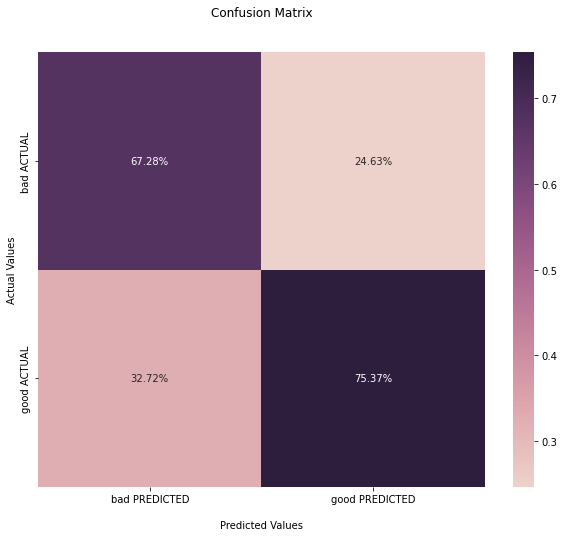

In [16]:
ax = plt.figure(figsize=(10,8))
ax = sns.heatmap(cf/np.sum(cf), annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='.2%')

ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

plt.show()

La précisions semble correcte pour les `good`, mais pas pour les `bad`, avec seulement 215 commentaires "bad" correctement prédits, soit environ 2/3 des prédictions `bad` seulement qui étaient justes.

## Decision tree

Entraine un arbre de décision sur ton jeu d'entrainement, puis compare les accuracy scores des jeux d'entrainement et de test. Y a-t-il de l'overfitting ? Les scores sont-ils bons ?

Affiche également une matrice de confusion pour le jeu de test. Combien y a-t-il de commentaires "bad" correctement prédits ?

In [17]:
modelDTC = DecisionTreeClassifier(random_state=32)
modelDTC.fit(X_train_scaled, y_train)

print(f"Accuracy score on the train dataset: {modelDTC.score(X_train_scaled, y_train)}")
print(f"Accuracy score on the test dataset: {modelDTC.score(X_test_scaled, y_test)}")

Accuracy score on the train dataset: 0.9789333333333333
Accuracy score on the test dataset: 0.6376


Enormément d'overfitting ici, et le score sur le jeu de test est assez mauvais.

In [18]:
cf = pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = modelDTC.predict(X_test_scaled)),
             index = modelDTC.classes_ + " ACTUAL",
             columns = modelDTC.classes_ + " PREDICTED")

cf

,bad PREDICTED,good PREDICTED
bad ACTUAL,329,425
good ACTUAL,481,1265


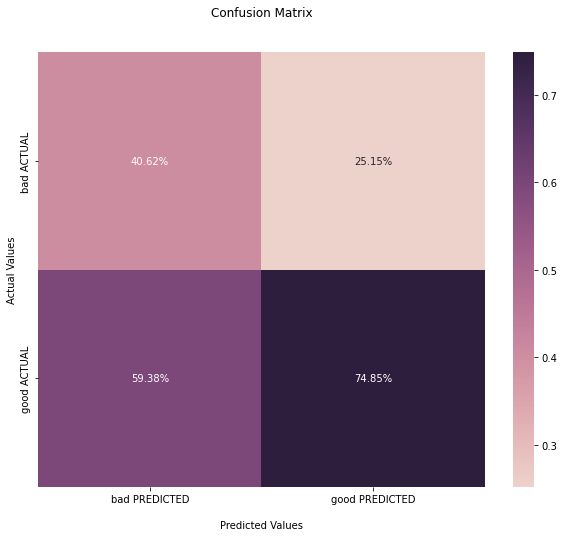

In [19]:
ax = plt.figure(figsize=(10,8))
ax = sns.heatmap(cf/np.sum(cf), annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='.2%')

ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

plt.show()

Ici seulement 269 commentaires "bad" correctement prédits, soit seulement 44% environ des prédictions `bad` seulement qui étaient correctes. Clairement ce modèle ne fonctionne pas en l'état.

## Decision tree - hyperparamètres

Change les paramètres du modèle pour réduire l'overfitting. Arrives-tu à un meilleur score qu'avec la régression logistique ?

In [20]:
modelDTC = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=5, random_state=32)
modelDTC.fit(X_train_scaled, y_train)

print(f"Accuracy score on the train dataset: {modelDTC.score(X_train_scaled, y_train)}")
print(f"Accuracy score on the test dataset: {modelDTC.score(X_test_scaled, y_test)}")

Accuracy score on the train dataset: 0.7198666666666667
Accuracy score on the test dataset: 0.7228


On arrive à un score similaire à la régression logistique, sans overfitting mais avec des performances assez limitées tout de même.

## Question bonus (optionnelle)

Utilise gridsearch pour trouver les meilleurs paramètres

In [21]:
params = {'max_depth': range(1, 11), 'min_samples_split': [2, 5, 7, 10, 15, 30], 'min_samples_leaf': range(1, 11)}

grid = GridSearchCV(DecisionTreeClassifier(), params)
grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_leaf': range(1, 11),
                         'min_samples_split': [2, 5, 7, 10, 15, 30]})

In [22]:
print("best score:", grid.best_score_)
print("best parameters:", grid.best_params_)

best score: 0.7110666666666667
best parameters: {'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 30}


In [23]:
modelDTC = DecisionTreeClassifier(max_depth=9, min_samples_split=30, min_samples_leaf=7, random_state=32)
modelDTC.fit(X_train_scaled, y_train)

print(f"Accuracy score on the train dataset: {modelDTC.score(X_train_scaled, y_train)}")
print(f"Accuracy score on the test dataset: {modelDTC.score(X_test_scaled, y_test)}")

Accuracy score on the train dataset: 0.7316
Accuracy score on the test dataset: 0.7224


Le gain est minime sur le jeu d'entrainement, et on perd très légèrement sur le jeu de test. Les paramètres trouvés le premier coup étaient déjà bons, ceux-ci le sont aussi mais il n'y a pas vraiment de gain.

In [24]:
cf = pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = modelDTC.predict(X_test_scaled)),
             index = modelDTC.classes_ + " ACTUAL",
             columns = modelDTC.classes_ + " PREDICTED")

cf

,bad PREDICTED,good PREDICTED
bad ACTUAL,246,508
good ACTUAL,186,1560


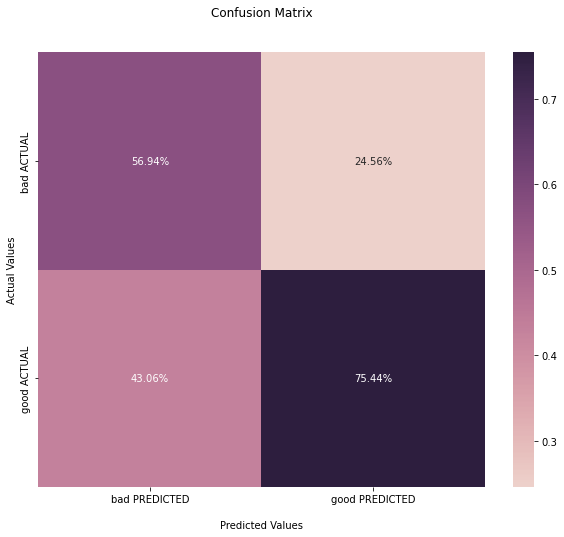

In [25]:
ax = plt.figure(figsize=(10,8))
ax = sns.heatmap(cf/np.sum(cf), annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='.2%')

ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

plt.show()

C'est un peu mieux sur la prédiction des bad mais toujours sans atteindre le niveau de la régression logistique. Comme on dirait, "c'est bien mais pas top".

# Partie 3 : NLP - Sentiment analysis - environ 1h

Définis une nouvelle variable `X_text` qui ne contiendra que la colonne `text`. y reste identique. 


In [26]:
X_text = df_restaurants['text']

## Crée une fonction de nettoyage des stopwords et de la ponctuation

Tu peux appeler ta fonction `func_clean`.
Ta fonction doit prendre un `str` en unique paramètre, et retourner un `str`.

Par exemple :

`func_clean("Hello, how are you? Fine, thank you.")`

`>>> 'hello fine thank'`

In [27]:
def text_clean(sentence):
    
    sentence = sentence.lower()
    tokenized = word_tokenize(sentence)
    token = [word for word in tokenized if re.search("[a-zA-Z0-9]", word)]
    stopwords_english = stopwords.words('english')
    return " ".join([word for word in token if word not in stopwords_english])

In [28]:
text_clean("Hello, how are you? Fine, thank you.")

'hello fine thank'

## Applique cette fonction 

Applique cette fonction à `X_text` et enregistre le résultat dans `X_clean`.

In [29]:
X_clean = X_text.apply(text_clean)
X_clean

0       wife took birthday breakfast excellent weather...
1       idea people give bad reviews place goes show p...
2       love gyro plate rice good also dig candy selec...
3       rosie dakota love chaparral dog park 's conven...
4       general manager scott petello good egg go deta...
                              ...                        
9995    first visit lunch today used groupon ordered b...
9996    called house deliciousness could go item item ...
9997    recently visited olive ivy business last week ...
9998    nephew moved scottsdale recently bunch friends...
9999    4-5 locations 4.5 star average think arizona r...
Name: text, Length: 10000, dtype: object

## Train test split

Découpe tes données `X_clean` et `y` avec un train test split, et le même `random_state = 32`.



In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, random_state=32, train_size = 0.75)

## TfidfVectorizer

- Entraine `TfidfVectorizer` sur `X_train` 
- Transforme avec ton vectorizer `X_train` et stocke le résultat dans `X_train_vecto`.
- Transforme avec ton vectorizer `X_test` et stocke le résultat dans `X_test_vecto`.

In [31]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

X_train_vecto = vectorizer.transform(X_train)
X_test_vecto = vectorizer.transform(X_test)

## Régression logistique

Entraine une régression logistique sur `X_train_vecto` et `y_train`.

Compare les accuracy scores des jeux d'entrainement et de test. Y a-t-il de l'overfitting ? Les scores sont-ils meilleurs que dans tes modèles du début du checkpoint ?

Affiche également une matrice de confusion pour le jeu de test. Combien y a-t-il de commentaires "bad" correctement prédits ?

In [32]:
model = LogisticRegression().fit(X_train_vecto, y_train)

print(f"Accuracy score on the train dataset: {model.score(X_train_vecto, y_train)}")
print(f"Accuracy score on the test dataset: {model.score(X_test_vecto, y_test)}")

Accuracy score on the train dataset: 0.8948
Accuracy score on the test dataset: 0.8384


Le score est bien meilleur que dans les modèles du début du checkpoint, avec encore un petit peu d'overfitting qu'on peut ignorer.

In [33]:
cf = pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = model.predict(X_test_vecto)),
             index = model.classes_ + " ACTUAL",
             columns = model.classes_ + " PREDICTED")

cf

,bad PREDICTED,good PREDICTED
bad ACTUAL,431,323
good ACTUAL,81,1665


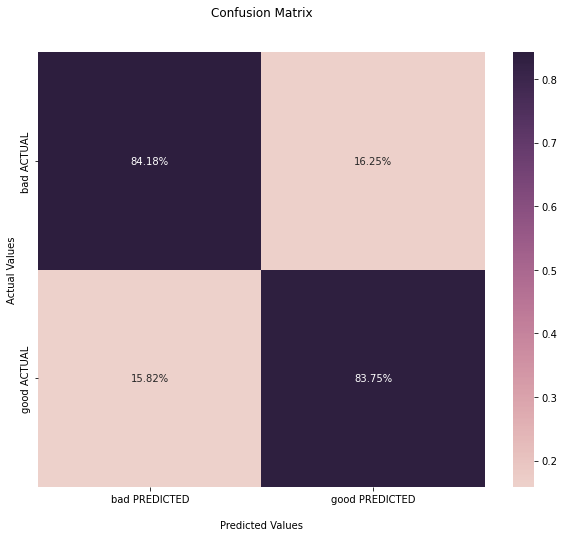

In [34]:
ax = plt.figure(figsize=(10,8))
ax = sns.heatmap(cf/np.sum(cf), annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='.2%')

ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

plt.show()

Encore beaucoup de faux positifs, mais on note 431 commentaires "bad" correctement prédits, soit 85% environ des prédictions `bad` seulement qui étaient correctes.

# Partie 4 : WebScraping - BeautifulSoup - environ 1h30

C'est l'hiver, et tu souhaiterais faire une petite étude de marché sur le prix des bonnets.
Effectue un webscraping des titres et des prix de la page suivante : https://www.primark.com/en/search?text=beanie
Essaye d'afficher le résultat dans un DataFrame.  Il doit y avoir environ une vingtaine de bonnets.

Voici un exemple de résultat attendu (évidemment, les prix et les produits peuvent bouger tous les jours, tu auras donc un résultat différent).






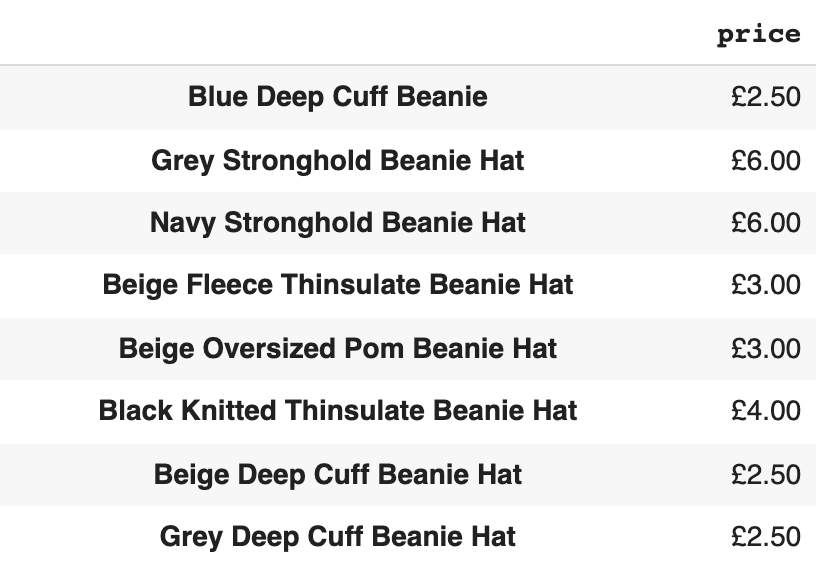

In [35]:
# On récupère le contenu de la page et on vérifie le code de réponse

url = 'https://www.primark.com/en/search?text=beanie'
html = requests.get(url)
html

<Response [200]>

In [36]:
# On la parse avec BeautifulSoup

soup = BeautifulSoup(html.text, 'html.parser')

In [37]:
# On récupère le contenu de la balise contenant les informations recherchées

item_block = soup.find_all('li', {'class':'product-listing__item product-item product-item--tall product-impression-item'})
len(item_block)

19

In [38]:
# On vérifie que chaque item de la liste contient bien les éléments nécessaires

item_block[2].text

'\n\n\n\n\n\n\n\n\n\n\n\n                            Blue Deep Cuff Beanie\n\n\n                        £2.50\n'

In [39]:
# On ajoute toutes ces données dans un dictionnaire

items_dict = {}

for i in range(len(item_block)):
    items_dict[item_block[i].find('p', {'class':'product-item__name'}).text.strip()] = item_block[i].find('div', {'class':'product-item__price'}).text.strip()
    
items_dict

{'Navy Stronghold Beanie Hat': '£6.00',
 'Grey Stronghold Beanie Hat': '£6.00',
 'Blue Deep Cuff Beanie': '£2.50',
 'Beige Deep Cuff Beanie Hat': '£2.50',
 'Grey Deep Cuff Beanie Hat': '£2.50',
 'Navy Deep Cuff Beanie Hat': '£2.50',
 'Black Deep Cuff Beanie Hat': '£2.50',
 'Black Super Soft Beanie Hat': '£1.50',
 'Beige Fleece Thinsulate Beanie Hat': '£3.00',
 'Beige Oversized Pom Beanie Hat': '£3.00',
 'Black Knitted Thinsulate Beanie Hat': '£4.00',
 'Grey Faux Fur Pom Beanie Hat': '£2.50',
 'Black Faux Fur Pom Beanie Hat': '£2.50',
 'Black Colour Block Penn Beanie Hat': '£5.00',
 'Blue Chunky Turn Up Beanie Hat': '£3.00',
 'Pink Faux Fur Pom Beanie Hat': '£2.50',
 'Basic Grey And Black Beanies 2 Pack': '£1.80',
 'Grey Disney Minnie Mouse Faux Fur Pom Beanie Hat': '£5.00'}

In [40]:
# On créé le dataframe avec les données du dictionnaire

df_beanies = pd.DataFrame.from_dict(items_dict, orient='index').rename(columns={0: 'Price'})
df_beanies

,Price
Navy Stronghold Beanie Hat,£6.00
Grey Stronghold Beanie Hat,£6.00
Blue Deep Cuff Beanie,£2.50
Beige Deep Cuff Beanie Hat,£2.50
Grey Deep Cuff Beanie Hat,£2.50
Navy Deep Cuff Beanie Hat,£2.50
Black Deep Cuff Beanie Hat,£2.50
Black Super Soft Beanie Hat,£1.50
Beige Fleece Thinsulate Beanie Hat,£3.00
Beige Oversized Pom Beanie Hat,£3.00


In [41]:
# Pas fan d'avoir les noms de bonnets en index donc une petite modification pour rendre le dataframe plus exploitable

df_beanies.reset_index(inplace=True)
df_beanies.rename(columns={'index': 'Name'}, inplace=True)
df_beanies

,Name,Price
0,Navy Stronghold Beanie Hat,£6.00
1,Grey Stronghold Beanie Hat,£6.00
2,Blue Deep Cuff Beanie,£2.50
3,Beige Deep Cuff Beanie Hat,£2.50
4,Grey Deep Cuff Beanie Hat,£2.50
5,Navy Deep Cuff Beanie Hat,£2.50
6,Black Deep Cuff Beanie Hat,£2.50
7,Black Super Soft Beanie Hat,£1.50
8,Beige Fleece Thinsulate Beanie Hat,£3.00
9,Beige Oversized Pom Beanie Hat,£3.00
